In [1]:
import tensorflow as tf


import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

Using TensorFlow backend.


In [2]:
EPOCHS = 100
INIT_LR = 1e-3
#to avoid crashing due to less ram
BS = 1000
default_image_size = tuple((220,220))
width=220
height=220
depth=3
inputShape=(220,220,3)


labels=['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']


In [3]:
TRAIN_DIR="/kaggle/input/tomatoleaf/tomato/train/"
os.listdir(TRAIN_DIR)

['Tomato___Late_blight',
 'Tomato___healthy',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Leaf_Mold',
 'Tomato___Spider_mites Two-spotted_spider_mite']

In [4]:
def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,default_image_size)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [5]:
TRAIN_DIR="/kaggle/input/tomatoleaf/tomato/train/"
index=0
data={}
for FOLDER in os.listdir(TRAIN_DIR):
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      if index not in data:
        data[index]=[]
      try:  
        data[index].append(img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir))
      except:
        print("Error to load the image "+TRAIN_DIR+FOLDER+"/"+image_dir)
    index=index+1  

In [6]:
labelencoder = LabelBinarizer()
label=labelencoder.fit_transform([0,1,2,3,4,5,6,7,8,9])
label

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [7]:
TRAIN_DIR="/kaggle/input/tomatoleaf/tomato/train/"
index=0
data=[]
for FOLDER in os.listdir(TRAIN_DIR):
    print(TRAIN_DIR+FOLDER)
    for image_dir in os.listdir(TRAIN_DIR+FOLDER):
      data.append({"x":img_to_np(TRAIN_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_train = np.array(x,dtype=np.float16)
y_train = np.array(y,dtype=np.float16)       

/kaggle/input/tomatoleaf/tomato/train/Tomato___Late_blight
/kaggle/input/tomatoleaf/tomato/train/Tomato___healthy
/kaggle/input/tomatoleaf/tomato/train/Tomato___Early_blight
/kaggle/input/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot
/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/kaggle/input/tomatoleaf/tomato/train/Tomato___Bacterial_spot
/kaggle/input/tomatoleaf/tomato/train/Tomato___Target_Spot
/kaggle/input/tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus
/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold
/kaggle/input/tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite


In [8]:
TEST_DIR="/kaggle/input/tomatoleaf/tomato/val/"
index=0
data=[]
for FOLDER in os.listdir(TEST_DIR):
    print(TEST_DIR+FOLDER)
    for image_dir in os.listdir(TEST_DIR+FOLDER):
      data.append({"x":img_to_np(TEST_DIR+FOLDER+"/"+image_dir,flatten=False),"y":label[index]})
    index=index+1
x,y=[],[]
for obj in data:
  x.append(obj["x"])
  y.append(obj["y"])
x_test = np.array(x,dtype=np.float16)
y_test = np.array(y,dtype=np.float16)  

/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight
/kaggle/input/tomatoleaf/tomato/val/Tomato___healthy
/kaggle/input/tomatoleaf/tomato/val/Tomato___Early_blight
/kaggle/input/tomatoleaf/tomato/val/Tomato___Septoria_leaf_spot
/kaggle/input/tomatoleaf/tomato/val/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/kaggle/input/tomatoleaf/tomato/val/Tomato___Bacterial_spot
/kaggle/input/tomatoleaf/tomato/val/Tomato___Target_Spot
/kaggle/input/tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus
/kaggle/input/tomatoleaf/tomato/val/Tomato___Leaf_Mold
/kaggle/input/tomatoleaf/tomato/val/Tomato___Spider_mites Two-spotted_spider_mite


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K

In [10]:

Model = Sequential()

Model.add(SeparableConv2D(32,3,
                          activation="relu",
                 input_shape=(220,220,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2)))

#
Model.add(SeparableConv2D(64,3,
                 activation="relu"))
Model.add(SeparableConv2D(128,(3,3),
                 activation="relu"))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2)))
Model.add(Dropout(0.25))
#
Model.add(SeparableConv2D(128,3,
                 activation="relu"))
Model.add(SeparableConv2D(256,(3,3),
                 activation="relu"))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2)))
Model.add(Dropout(0.25))
Model.add(GlobalAveragePooling2D())

#
Model.add(Flatten())
Model.add(Dense(1024,
                activation="relu"))
Model.add(Dropout(0.25))
Model.add(Dense(10,
                activation="softmax"))

Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 218, 218, 32)      155       
_________________________________________________________________
batch_normalization (BatchNo (None, 218, 218, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 107, 107, 64)      2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 105, 105, 128)     8896      
_________________________________________________________________
batch_normalization_1 (Batch (None, 105, 105, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 52, 52, 128)       0

In [11]:
Model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
aug = ImageDataGenerator(fill_mode="nearest")
model_history = Model.fit_generator(
        aug.flow(x_train, y_train, batch_size=100),
        validation_data=(x_test, y_test),
        epochs=100, verbose=1
)    

Train for 100 steps, validate on 1000 samples
Epoch 1/100
100/100 [==============================] - 74s 740ms/step - loss: 0.1803 - accuracy: 0.9327 - val_loss: 0.3262 - val_accuracy: 0.9000
Epoch 2/100
100/100 [==============================] - 70s 704ms/step - loss: 0.0863 - accuracy: 0.9658 - val_loss: 0.3428 - val_accuracy: 0.9000
Epoch 3/100
100/100 [==============================] - 70s 704ms/step - loss: 0.0611 - accuracy: 0.9765 - val_loss: 0.4171 - val_accuracy: 0.8409
Epoch 4/100
100/100 [==============================] - 70s 704ms/step - loss: 0.0475 - accuracy: 0.9825 - val_loss: 0.4733 - val_accuracy: 0.8498
Epoch 5/100
100/100 [==============================] - 70s 702ms/step - loss: 0.0403 - accuracy: 0.9849 - val_loss: 0.1680 - val_accuracy: 0.9355
Epoch 6/100
100/100 [==============================] - 70s 702ms/step - loss: 0.0333 - accuracy: 0.9873 - val_loss: 0.2249 - val_accuracy: 0.9282
Epoch 7/100
100/100 [==============================] - 70s 702ms/step - loss: 

In [12]:
Model.save("/kaggle/working/model.h5")

In [13]:
scores = Model.evaluate(x_test, y_test)
print("Accuracy is :"+str(scores[1]*100)+" %")

1000/1000 [==============================] - 1s 1ms/sample - loss: 0.0415 - accuracy: 0.9904
Accuracy is :99.04000163078308 %


In [14]:
arr=img_to_np("/kaggle/input/tomatoleaf/tomato/val/Tomato___healthy/0cb10f98-491d-4e1f-b8ea-4fb0f1b3675f___GH_HL Leaf 333.JPG",flatten=False)
arr=arr.reshape(1,220,220,3)
labels[labelencoder.inverse_transform(Model.predict(arr))[0]]

'Tomato___healthy'

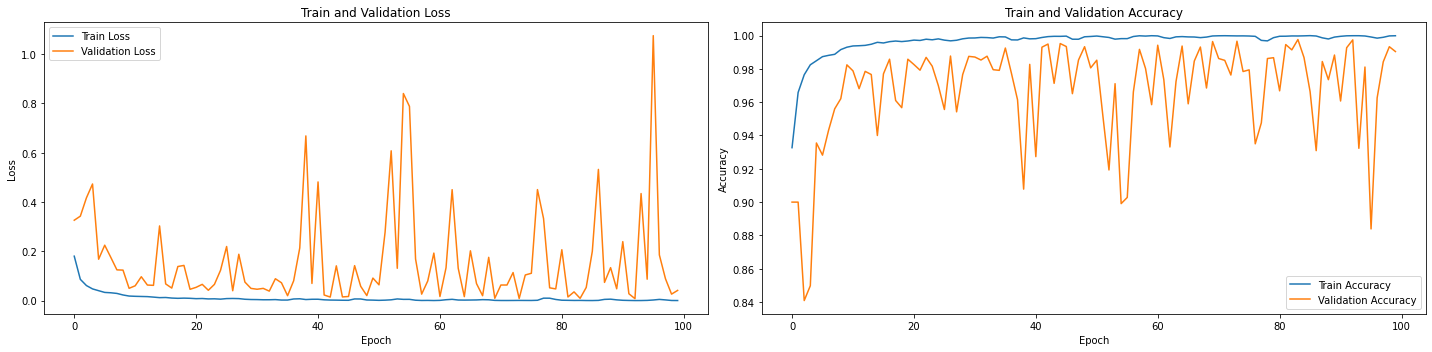

In [15]:
EPOCHS=100
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(range(EPOCHS),model_history.history['loss'],label="Train Loss")
plt.plot(range(EPOCHS),model_history.history['val_loss'], label="Validation Loss")
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(range(EPOCHS),model_history.history['accuracy'], label="Train Accuracy")
plt.plot(range(EPOCHS),model_history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.tight_layout()